In [1]:
import torch
from torch import nn, optim
from matplotlib import pyplot as plt
from PIL import Image
from time import time

from torchvision.transforms.functional import to_tensor, to_grayscale, to_pil_image

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
img = Image.open("Drawings.png")
img = img.resize((512, 512))

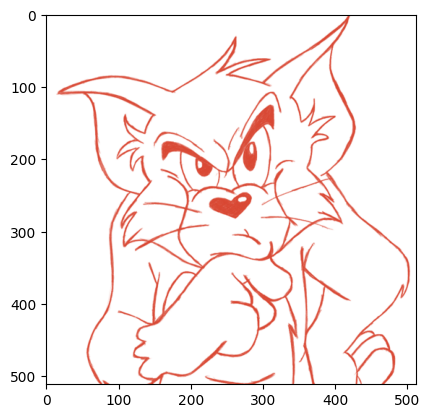

In [4]:
plt.imshow(img)

In [5]:
layers = [nn.Linear(2, 32), nn.LeakyReLU()]

for i in range(3):
    layers.append(nn.Linear(32, 32))
    layers.append(nn.LeakyReLU())
    layers.append(nn.BatchNorm1d(32))

layers.append(nn.Linear(32, 64))
layers.append(nn.LeakyReLU())
layers.append(nn.BatchNorm1d(64))

for i in range(3):
    layers.append(nn.Linear(64, 64))
    layers.append(nn.LeakyReLU())
    layers.append(nn.BatchNorm1d(64))

layers.append(nn.Linear(64, 32))
layers.append(nn.LeakyReLU())
layers.append(nn.BatchNorm1d(32))

layers.append(nn.Linear(32, 16))
layers.append(nn.LeakyReLU())
layers.append(nn.BatchNorm1d(16))
layers.append(nn.Linear(16, 8))
layers.append(nn.LeakyReLU())
layers.append(nn.BatchNorm1d(8))
layers.append(nn.Linear(8, 2))

model = nn.Sequential(*layers).to(device)

In [6]:
data = to_tensor(to_grayscale(img)).squeeze()

In [7]:
X = torch.Tensor([[i, j] for i in range(512) for j in range(512)])

In [8]:
data = (data != 1).to(torch.float)

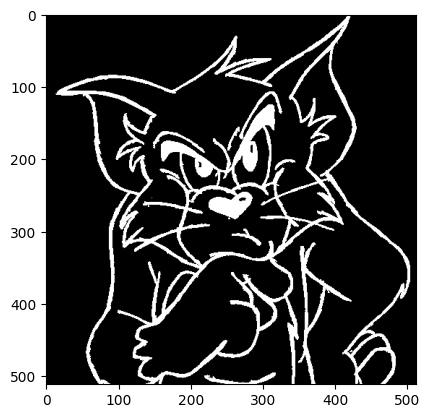

In [9]:
plt.imshow(to_pil_image(data), cmap='gray')

In [10]:
Y = data.reshape(512 * 512)

In [11]:
X, Y = torch.FloatTensor(X), torch.FloatTensor(Y)
X, Y = X.to(torch.float).to(device), Y.to(device)

In [12]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-5)
logps = model(X)
loss = loss_fn(logps, Y.long())
loss

tensor(0.9192, device='cuda:0', grad_fn=<NllLossBackward0>)

In [13]:
def plot(output, e):
    pix_vals = torch.argmax(output, dim = -1)
    pix_vals = pix_vals.reshape((512, 512))
    out_image = to_pil_image(pix_vals.to(torch.float))
    out_image.save(f"outputs/out_{e}.png")

In [19]:
time0 = time()
epochs = 8000
model.train()

for e in range(epochs):
    optimizer.zero_grad()

    output = model(X)
    plot(output, e)
    loss = loss_fn(output, Y.long())

    loss.backward()
    optimizer.step()

    print("Epoch {} - Training loss: {}".format(e, loss.detach().item()))

print("\nTraining Time (in minutes) =", (time() - time0) / 60)

Epoch 8000 - Training loss: 0.1179480105638504
Epoch 8001 - Training loss: 0.11777585744857788
Epoch 8002 - Training loss: 0.11769340187311172
Epoch 8003 - Training loss: 0.11766738444566727
Epoch 8004 - Training loss: 0.11772160977125168
Epoch 8005 - Training loss: 0.11776300519704819
Epoch 8006 - Training loss: 0.11784383654594421
Epoch 8007 - Training loss: 0.11783389002084732
Epoch 8008 - Training loss: 0.11778085678815842
Epoch 8009 - Training loss: 0.11775003373622894
Epoch 8010 - Training loss: 0.11785408109426498
Epoch 8011 - Training loss: 0.1177179142832756
Epoch 8012 - Training loss: 0.11767761409282684
Epoch 8013 - Training loss: 0.11768002063035965
Epoch 8014 - Training loss: 0.11780818551778793
Epoch 8015 - Training loss: 0.1176968440413475
Epoch 8016 - Training loss: 0.11768754571676254
Epoch 8017 - Training loss: 0.11771579831838608
Epoch 8018 - Training loss: 0.11756576597690582
Epoch 8019 - Training loss: 0.11736854165792465
Epoch 8020 - Training loss: 0.1172714456915

In [15]:
X.dtype, Y.dtype

(torch.float32, torch.float32)